# **Load Dataset**

In [ ]:
# !wget --no-check-certificate "https://drive.google.com/uc?export=download&id=1XxuP8A3hKf2Nt6dtPny-j9w_cmcyRTSZ" -O dataset.zip
# !unzip dataset.zip -d dataset

--2024-11-22 17:27:50--  https://drive.google.com/uc?export=download&id=1XxuP8A3hKf2Nt6dtPny-j9w_cmcyRTSZ
Resolving drive.google.com (drive.google.com)... 142.250.31.113, 142.250.31.100, 142.250.31.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.31.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1XxuP8A3hKf2Nt6dtPny-j9w_cmcyRTSZ&export=download [following]
--2024-11-22 17:27:50--  https://drive.usercontent.google.com/download?id=1XxuP8A3hKf2Nt6dtPny-j9w_cmcyRTSZ&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.163.132, 2607:f8b0:4004:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.163.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10092111 (9.6M) [application/octet-stream]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]   9.62M  44.2MB/s

In [ ]:
# !kaggle datasets download -d pradwitanasha/dataset-jpeg-trial-food-ingredients
# !unzip dataset-jpeg-trial-food-ingredients.zip -d datase

Dataset URL: https://www.kaggle.com/datasets/pradwitanasha/dataset-jpeg-trial-food-ingredients
License(s): apache-2.0
 93% 65.0M/70.2M [00:03<00:00, 26.1MB/s]
100% 70.2M/70.2M [00:03<00:00, 22.1MB/s]
Archive:  dataset-jpeg-trial-food-ingredients.zip
  inflating: datase/Ayam/1136937_81968550-1b54-4908-a3e3-5ab4f1099926_1161_1161.jpeg  
  inflating: datase/Ayam/1167245_720.jpeg  
  inflating: datase/Ayam/18GPy1vDSG1Q.jpeg  
  inflating: datase/Ayam/201711281942253_b.jpeg  
  inflating: datase/Ayam/2022-01-08-jangan-pernah-cuci-ayam-mentah-sebelum-dimasak.jpeg  
  inflating: datase/Ayam/2690456462.jpeg  
  inflating: datase/Ayam/2884058488.jpeg  
  inflating: datase/Ayam/2e91101f90ada67e5c14dd9e210e9995.jpeg  
  inflating: datase/Ayam/31156333303-5-penyakit-yang-bisa-muncul-ketika-kita-makan-ayam-mentah-pzkgfdnpcu.jpeg  
  inflating: datase/Ayam/415e39c5-1927-42b5-ae6e-6134e4aa074e_169.jpeg  
  inflating: datase/Ayam/49761ab0-08b4-4b1c-92fb-9e33011c0664_169.jpeg  
  inflating: datase/Ayam

In [ ]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset/
!unzip vegetable-image-dataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Vegetable Images/train/Radish/0001.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0002.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0003.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0004.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0005.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0006.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0007.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0008.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0009.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0010.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0011.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0012.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0013.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0014.jpg  
  inflating: dataset/Vegetable Images/train/Radish/0015.jpg  
  inflating: datase

In [ ]:
Data_Dir = "dataset/Vegetable Images"

# **Import Library**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# **Split Train Val Dataset**

In [ ]:
def train_val_datasets():

    training_dataset, validation_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=Data_Dir,
        image_size=(150,150),
        batch_size=32,
        validation_split=0.2,
        subset="both",
        seed=42
    )
    return training_dataset, validation_dataset

In [ ]:
training_dataset, validation_dataset = train_val_datasets()

Found 21000 files belonging to 3 classes.
Using 16800 files for training.
Using 4200 files for validation.


# **Augmentation Model**

In [ ]:
augmentation_model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomTranslation(0.2, 0.2),
])

augmented_train_dataset = training_dataset.map(
    lambda x, y: (augmentation_model(x, training=True), y)
)

# **CNN Model**

In [ ]:
model = tf.keras.models.Sequential([
		tf.keras.Input(shape=(150, 150, 3)),
        augmentation_model,
        tf.keras.layers.Rescaling(1./255),

        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(training_dataset.class_names), activation='softmax'),
    ])

model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss="sparse_categorical_crossentropy",
        metrics=['accuracy']
    )

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_8 (Rescaling)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 148, 148, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 72, 72, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 34, 34, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 15, 15, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_7           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 115,299 (450.39 KB)

 Trainable params: 114,819 (448.51 KB)

 Non-trainable params: 480 (1.88 KB)

In [ ]:
history = model.fit(
	training_dataset,
	epochs=15,
	validation_data=validation_dataset,
)

Epoch 1/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 726s 1s/step - accuracy: 0.6952 - loss: 0.8936 - val_accuracy: 0.7026 - val_loss: 0.8450
Epoch 2/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 712s 1s/step - accuracy: 0.7211 - loss: 0.8048 - val_accuracy: 0.7026 - val_loss: 0.8308
Epoch 3/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 742s 1s/step - accuracy: 0.7219 - loss: 0.8024 - val_accuracy: 0.7026 - val_loss: 0.8257
Epoch 4/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 722s 1s/step - accuracy: 0.7210 - loss: 0.7983 - val_accuracy: 0.7024 - val_loss: 0.8198
Epoch 5/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 713s 1s/step - accuracy: 0.7225 - loss: 0.7945 - val_accuracy: 0.7026 - val_loss: 0.8213
Epoch 6/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 737s 1s/step - accuracy: 0.7210 - loss: 0.7948 - val_accuracy: 0.7026 - val_loss: 0.8643
Epoch 7/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 752s 1s/step - accuracy: 0.7211 - loss: 0.7920 - val_accuracy: 0.7026 - val_loss: 0.8167
Epoch 8/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 749s 1s/step - accuracy: 0.7196 - loss: 0.7950 - val_accu

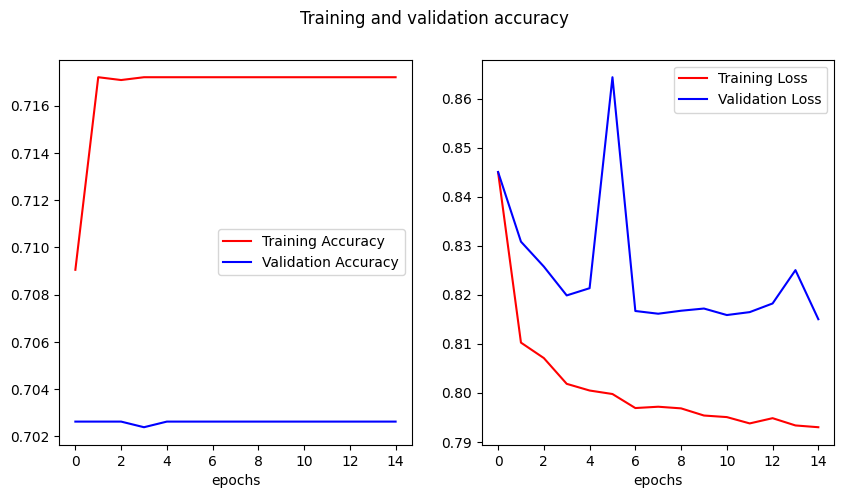

In [ ]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()